## Набор данных о раке молочной железы Висконсин (диагностический)

**Набор данных о раке молочной железы представляет собой двоичный набор данных классификации.**

Характеристики набора данных:

<table align="left">
    <tr>
        <th style="background-color: #E6E6FA">Number of Instances:</th>
        <td>569</td>
    </tr>
    <tr>
        <th style="background-color: #E6E6FA">Number of Attributes:</th>
        <td>30 numeric, predictive attributes and the class</td>
    </tr>
    <tr>
        <th style="background-color: #E6E6FA"|>Attribute Information:</th>
        <td>
            <ul>
                <li>radius (mean of distances from center to points on the perimeter)</li>
                <li>texture (standard deviation of gray-scale values)</li>
                <li>perimeter</li>
                <li>area</li>
                <li>smoothness (local variation in radius lengths)</li>
                <li>compactness (perimeter^2 / area - 1.0)</li>
                <li>concavity (severity of concave portions of the contour)</li>
                <li>concave points (number of concave portions of the contour)</li>
                <li>symmetry</li>
                <li>fractal dimension (“coastline approximation” - 1) </li>
            </ul>
        </td>
    </tr>
    <tr>
        <th style="background-color: #E6E6FA">Missing Attribute Values:</th>
        <td>None</td>
    </tr>
    <tr>
        <th style="background-color: #E6E6FA">Class Distribution:</th>
        <td>212 - Malignant, 357 - Benign</td>
    </tr>
</table>

**Импортируем необходимые библиотеки:**

In [219]:
import matplotlib.pyplot as plt 
plt.rc("font", size = 14)

import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from warnings import simplefilter
simplefilter(action = 'ignore', category = FutureWarning)

import seaborn as sb
sb.set(style = "white")
sb.set(style = "whitegrid", color_codes = True)

**Создадим DataFrame при помощи метода из библиотеки Pandas read_csv.**

In [220]:
data = pd.read_csv('breast_cancer.csv')

**С помощью метода info можно посмотреть общие сведения о DataFrame.**

In [221]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 569 non-null    int64  
 1   Diagnosis                          569 non-null    object 
 2   radius(mean)                       569 non-null    float64
 3   texture(mean)                      569 non-null    float64
 4   perimeter(mean)                    569 non-null    float64
 5   area(mean)                         569 non-null    float64
 6   smoothness(mean)                   569 non-null    float64
 7   compactness(mean)                  569 non-null    float64
 8   concavity(mean)                    569 non-null    float64
 9   concave points(mean)               569 non-null    float64
 10  symmetry(mean)                     569 non-null    float64
 11  fractal dimension(mean)            569 non-null    float64

**Для наглядности выведем первые и последние 5 строк DataFrame.**

In [222]:
data.head()

,ID,Diagnosis,radius(mean),texture(mean),perimeter(mean),area(mean),smoothness(mean),compactness(mean),concavity(mean),concave points(mean),...,radius(worst),texture(worst),perimeter(worst),area(worst),smoothness(worst),compactness(worst),concavity(worst),concave points(worst),symmetry(worst),fractal dimension(worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [223]:
data.tail()

,ID,Diagnosis,radius(mean),texture(mean),perimeter(mean),area(mean),smoothness(mean),compactness(mean),concavity(mean),concave points(mean),...,radius(worst),texture(worst),perimeter(worst),area(worst),smoothness(worst),compactness(worst),concavity(worst),concave points(worst),symmetry(worst),fractal dimension(worst)
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Представление данных в виде гистограмм:**

Diagnosis
B    [[AxesSubplot(0.125,0.777333;0.125x0.102667), ...
M    [[AxesSubplot(0.125,0.777333;0.125x0.102667), ...
dtype: object

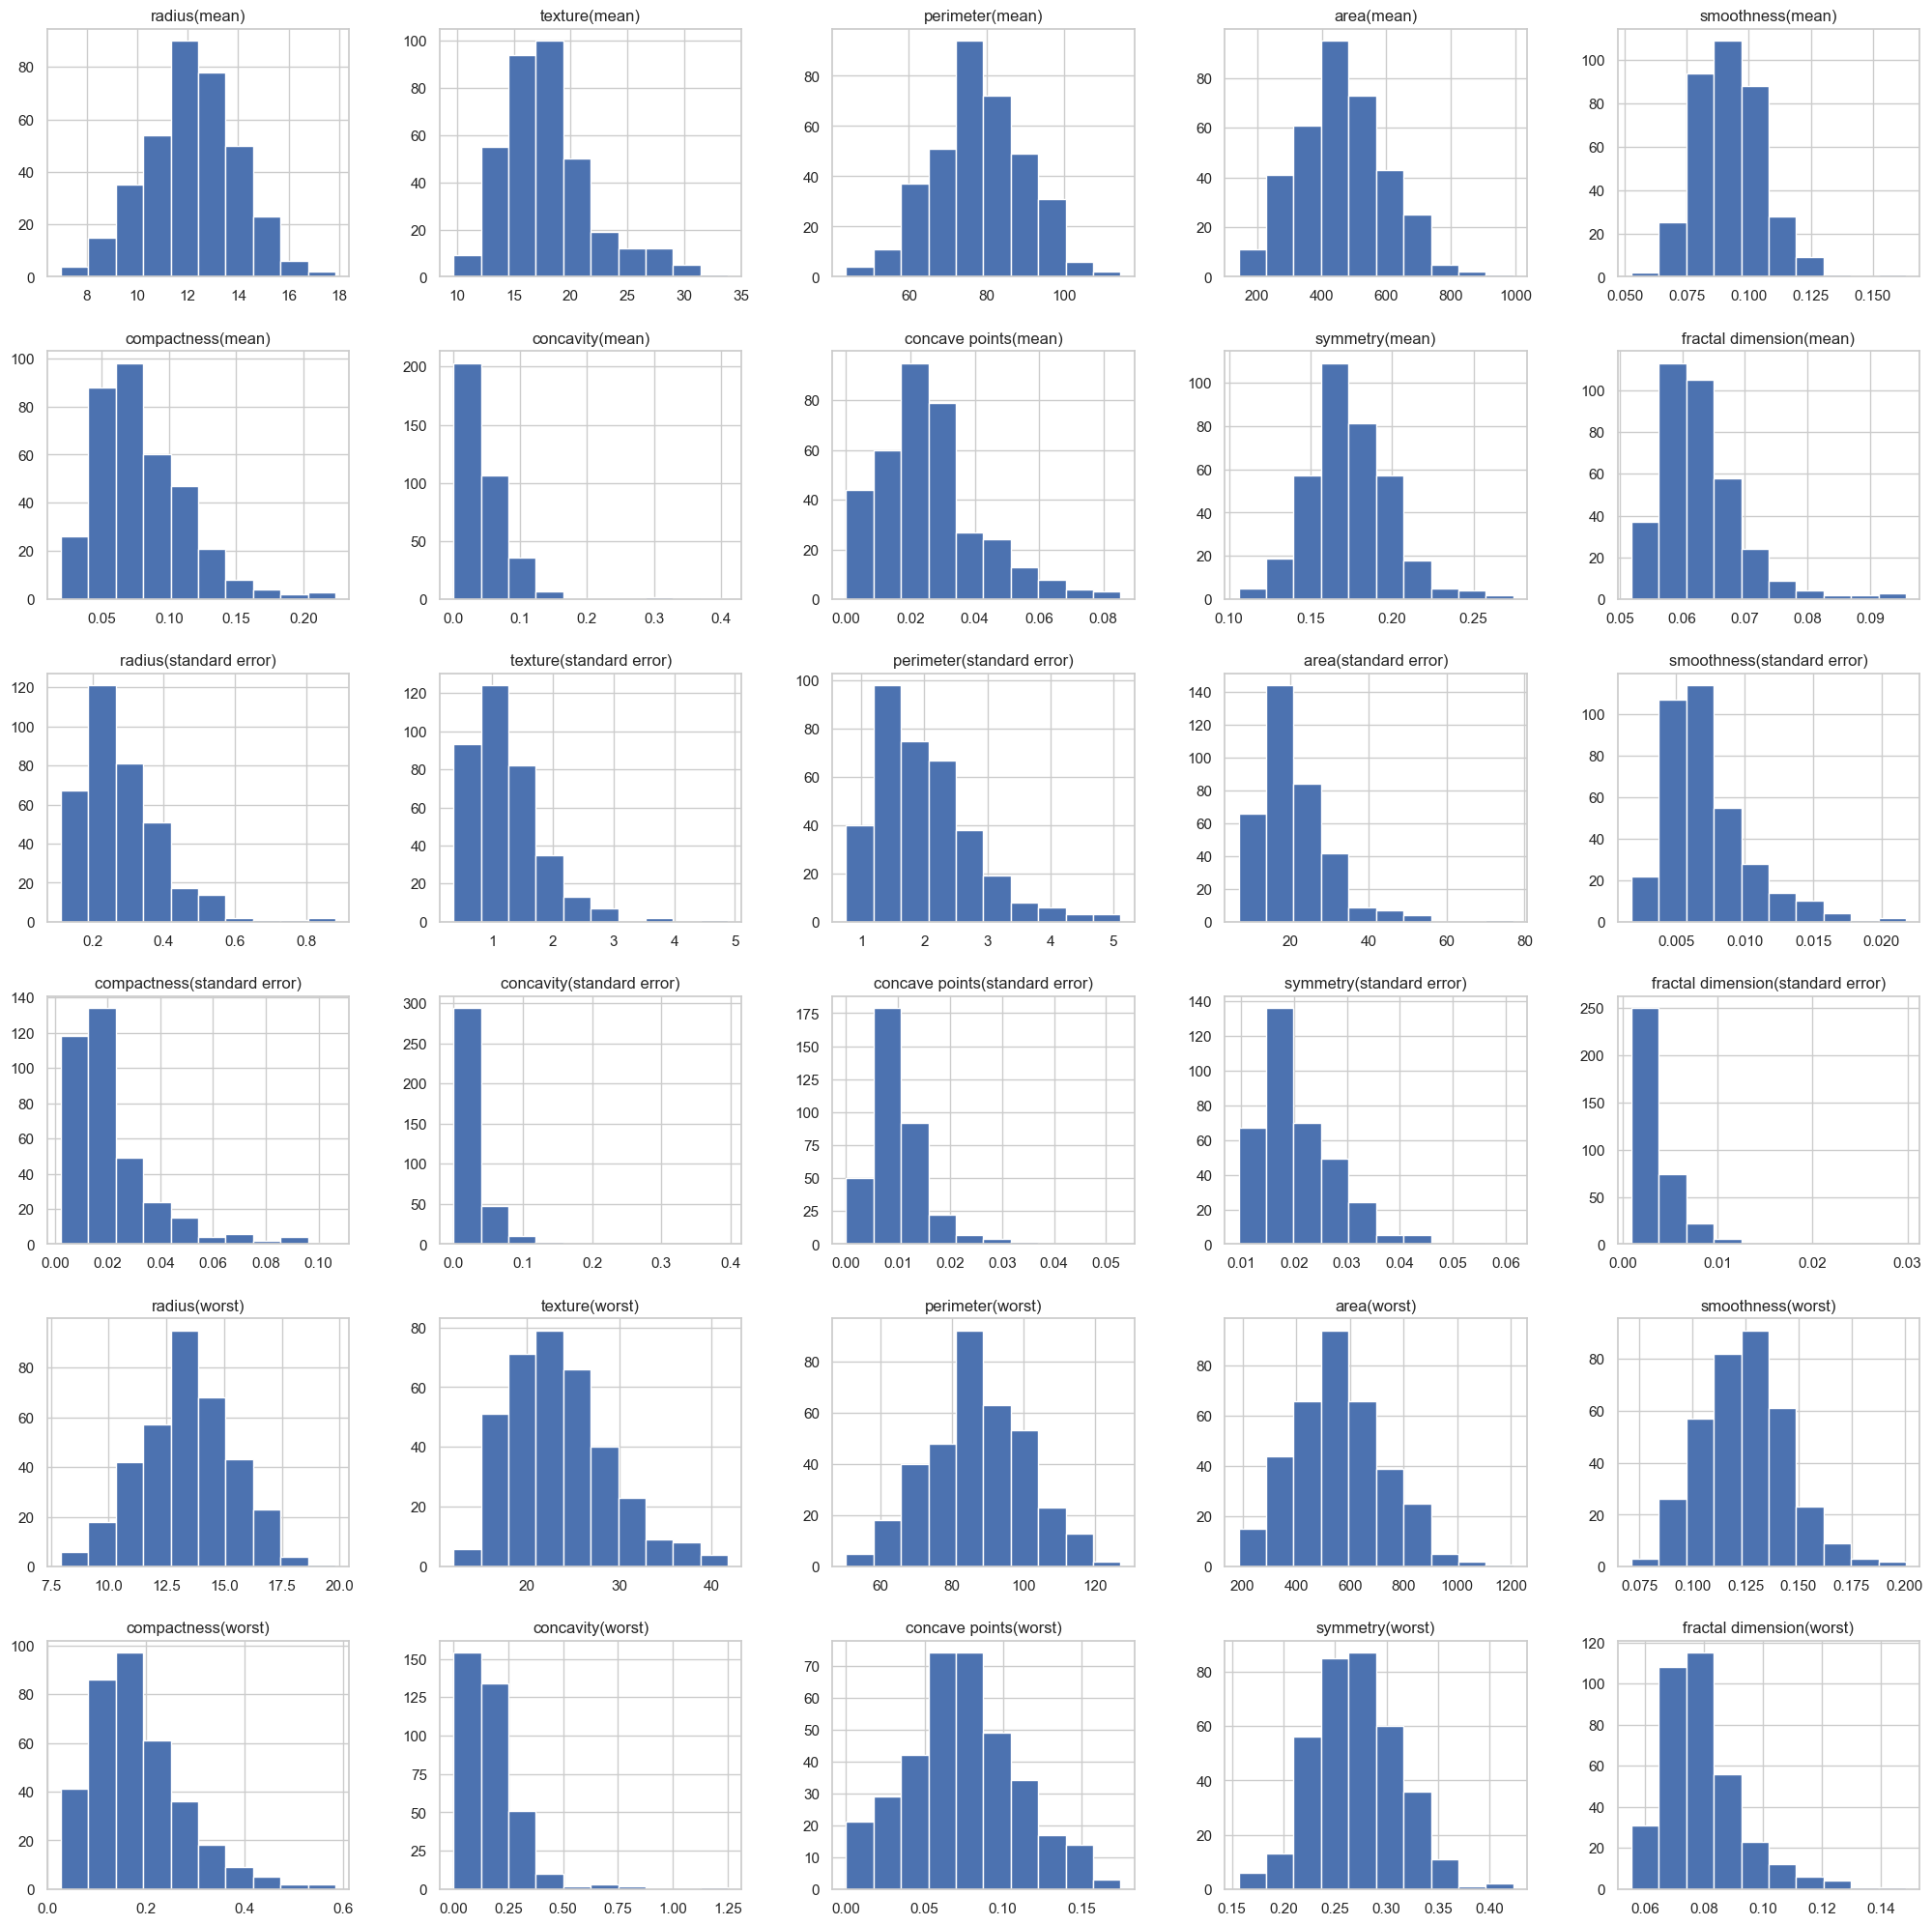

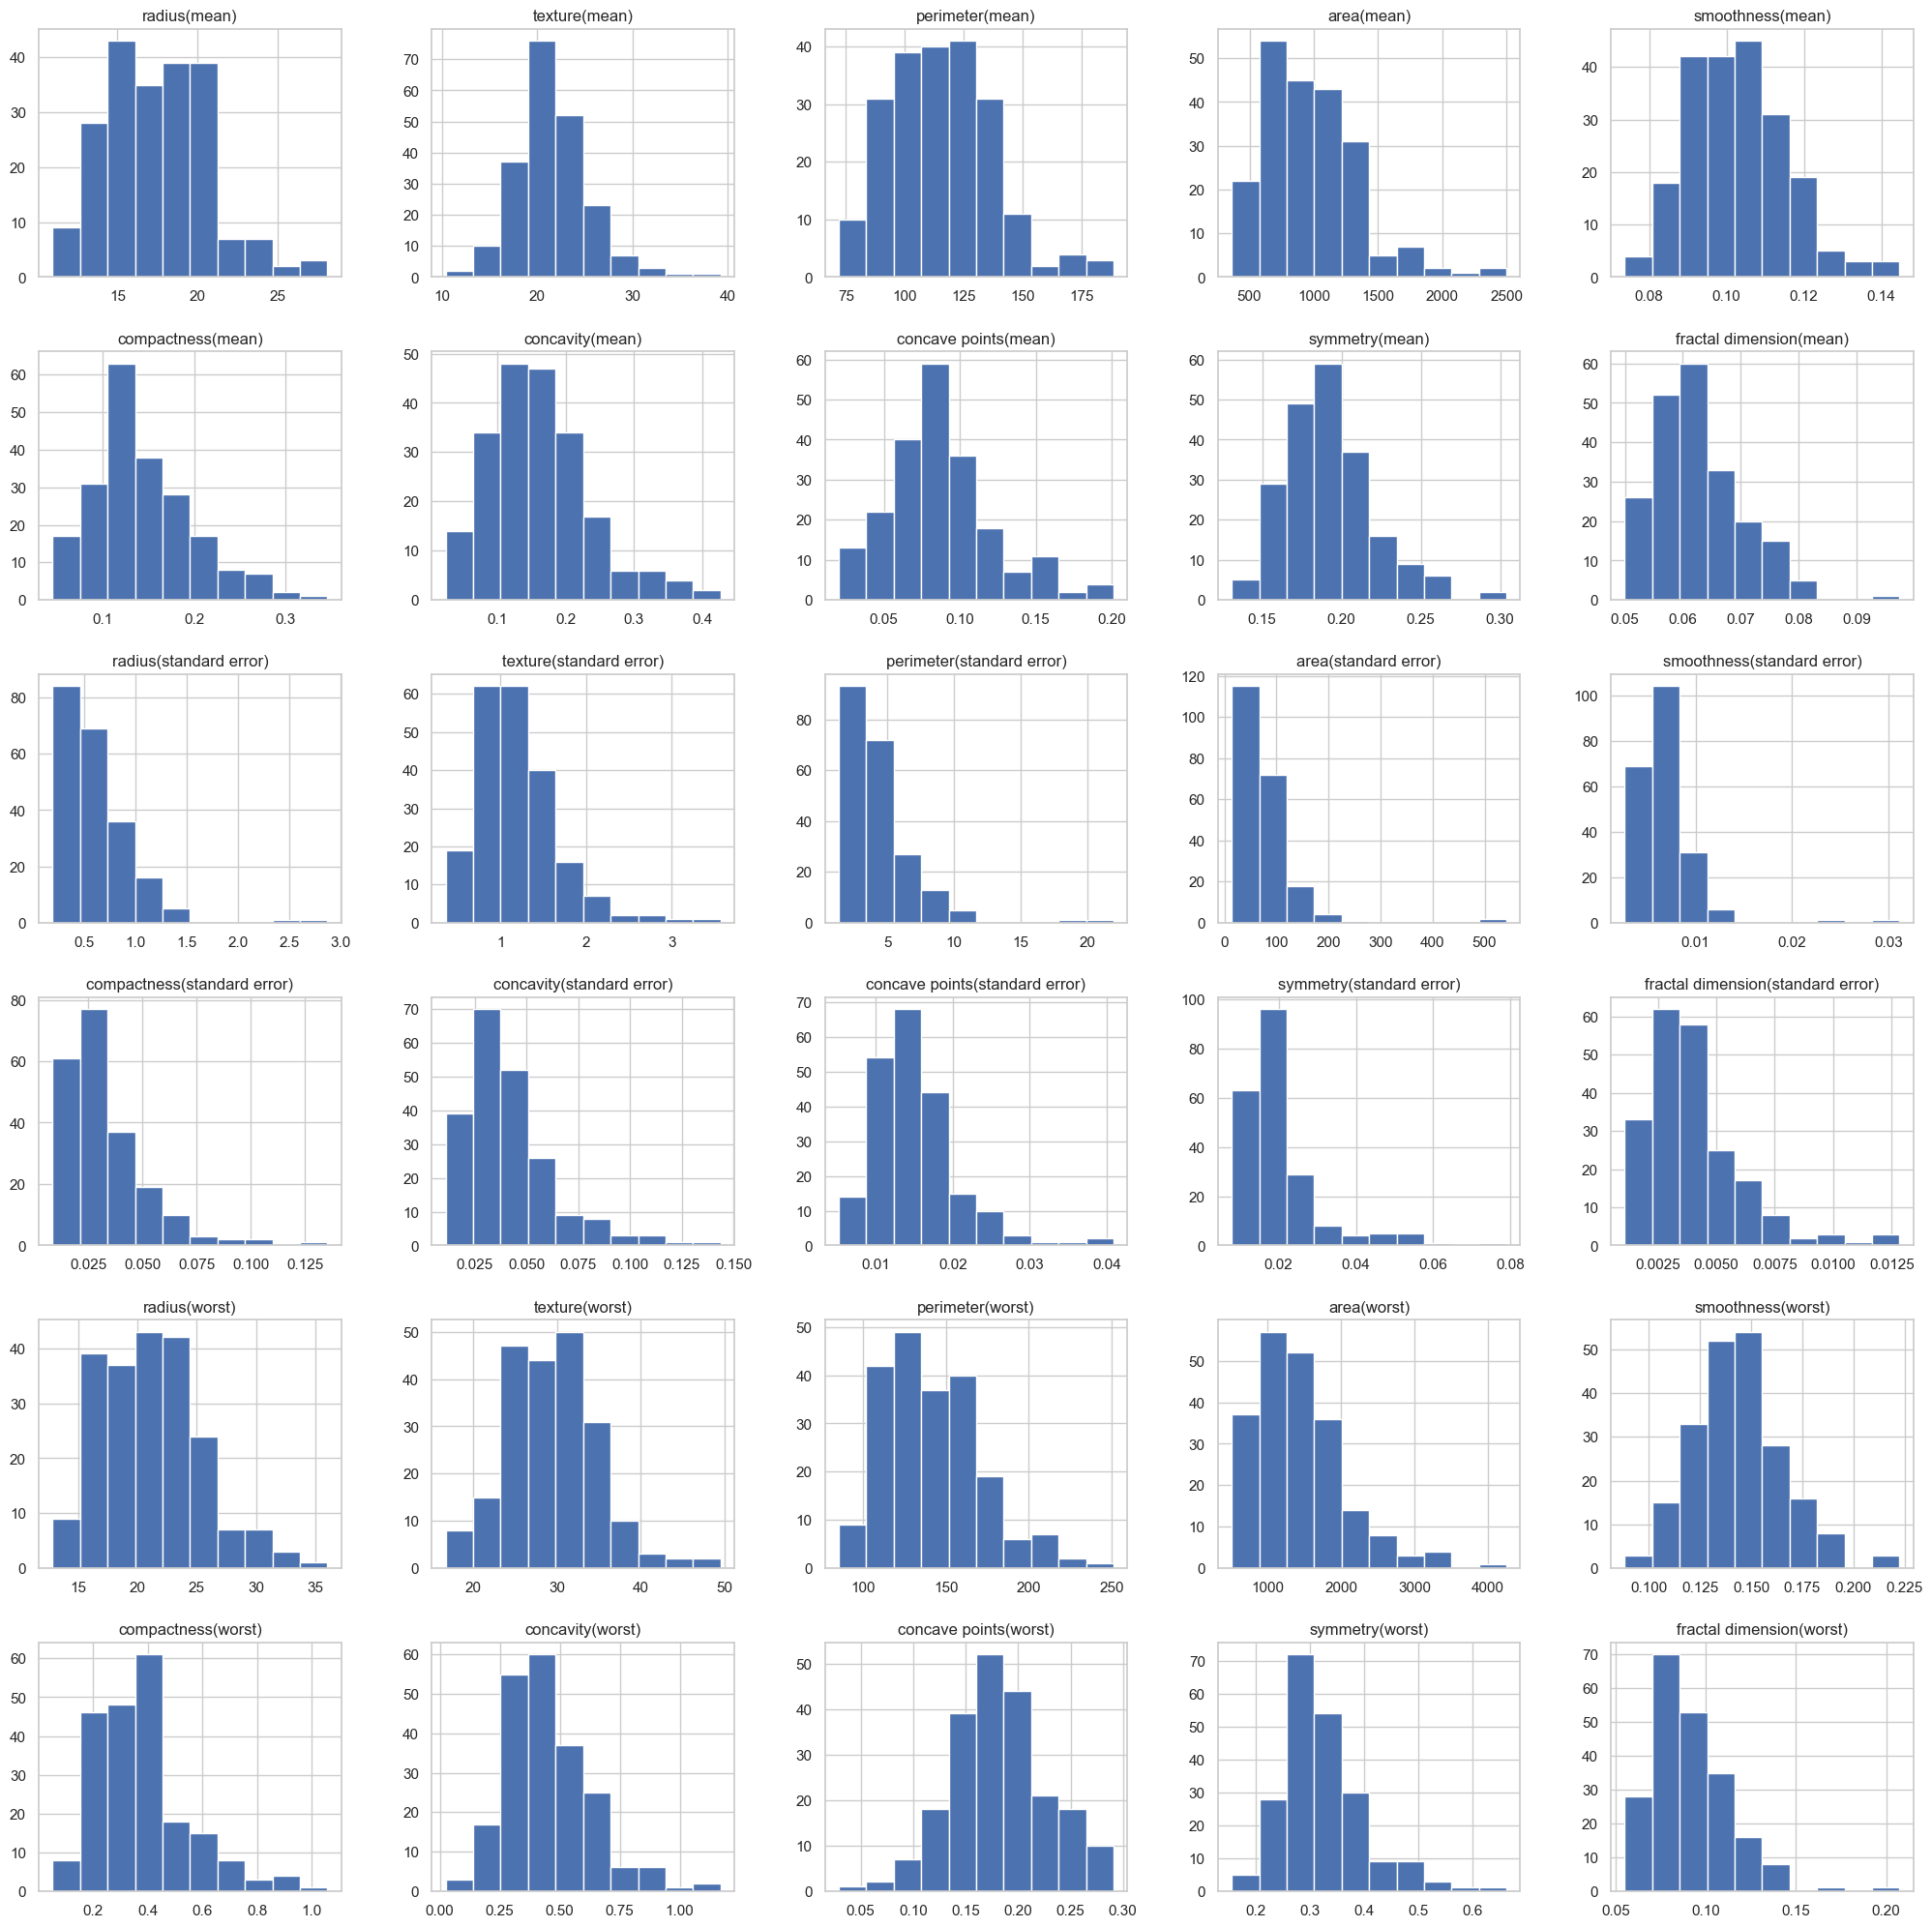

In [224]:
data.drop(columns = data.columns[0], axis = 1, inplace = True)
data.groupby('Diagnosis').hist(figsize=(25, 25))

**Воспользуемся методом value_counts для просмотра информации о столбце "Диагноз". Можно увидеть, что у 357 человек рак доброкачественный (В), а у 212 человек - злокачественный (М).**

In [225]:
data['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

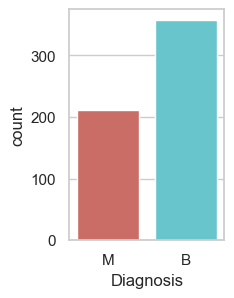

In [226]:
sb.countplot(x = 'Diagnosis', data = data, palette = 'hls')
sb.set(rc = {"figure.figsize": (2, 3)})
plt.show()

**Инициализируем вектор признаков X и целевой вектор Y:**

In [227]:
X = data.iloc[:, 1:31].values
Y = data.iloc[:, 0].values

**Преобразуем категориальные данные в числовые значения. Условимся, что 1 - рак злокачественный, 0 - доброкачественный. Исходные категориальные данные:**

In [228]:
print(Y)
len(Y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

569

**Получившиеся числовые значения:**

In [229]:
Y = LabelEncoder().fit_transform(Y)
print(Y)
len(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

569

### Разделение датасета на train и test

**Используем модуль train_test_split библиотеки Scikit-learn.**

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.67, random_state = 0)

print(f"Классы в Y_train:\n{Y_train}")
print(f"Классы в Y_test:\n{Y_test}")

Классы в Y_train:
[1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]
Классы в Y_test:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 

In [231]:
print(f"Количество строк в Y_train по классам: {np.bincount(Y_train)}")
print(f"Количество строк в Y_test по классам: {np.bincount(Y_test)}")

Количество строк в Y_train по классам: [236 145]
Количество строк в Y_test по классам: [121  67]


### Масштабирование

In [232]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.373415   -0.15566783  1.31576198 ...  1.40403785  1.00124952
  -0.04766277]
 [-0.96882263 -1.01353272 -0.98619265 ... -1.24716519 -0.92650707
  -0.88583657]
 [-1.12940157 -1.03497934 -1.13539341 ... -1.37353562  1.03241778
  -0.19825924]
 ...
 [-1.33261699 -0.21524178 -1.32561433 ... -0.99881851 -0.6865115
  -0.13450307]
 [-1.25398868 -0.23907136 -1.28901792 ... -1.76431419 -1.53584646
  -1.00125722]
 [-0.75840885  1.12159768 -0.7344415  ... -0.30165985 -1.21948867
   0.19307173]]


### Метод: Логистическая регрессия

In [233]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)
LR_prediction = LR.predict(X_test)

**Матрица путаницы**

Матрица путаницы — способ оценки качества модели. Представляет собой таблицу 2х2, в которой показаны прогнозируемые значения из модели и фактические значения из тестового набора данных.

In [234]:
cm_LR = confusion_matrix(LR_prediction, Y_test)
print(cm_LR)

[[120   3]
 [  1  64]]


([<matplotlib.axis.YTick at 0x12c99ba9910>,
 [Text(0, 0, ''), Text(0, 0, '')])

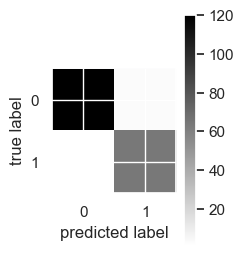

In [235]:
plt.imshow(confusion_matrix(LR_prediction, Y_test), 
           interpolation='nearest', cmap = plt.cm.binary)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.xticks([0, 1])
plt.yticks([0, 1])

**Оценка точности**

In [236]:
accuracy_score(LR_prediction, Y_test) # Точность на тестовой выборке

0.9787234042553191

In [237]:
accuracy = (cm_LR[0][0] + cm_LR[1][1]) / (cm_LR[0][0] + cm_LR[1][1] + cm_LR[1][0] + cm_LR[0][1])
print(accuracy)

0.9787234042553191


In [238]:
print(classification_report(LR_prediction, Y_test, digits = 4))

              precision    recall  f1-score   support

           0     0.9917    0.9756    0.9836       123
           1     0.9552    0.9846    0.9697        65

    accuracy                         0.9787       188
   macro avg     0.9735    0.9801    0.9767       188
weighted avg     0.9791    0.9787    0.9788       188



In [239]:
np.mean(LR.predict(X_test) == Y_test) # Точность на тестовой выборке

0.9787234042553191

In [240]:
np.mean(LR.predict(X_test) != Y_test) # Ошибка на тестовой выборке

0.02127659574468085

In [241]:
np.mean(LR.predict(X_train) == Y_train) # Точность на обучающей выборке

0.989501312335958

In [242]:
np.mean(LR.predict(X_train) != Y_train) # Ошибка на обучающей выборке

0.010498687664041995

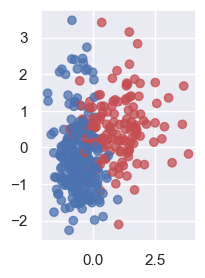

In [243]:
plt.scatter(X_train[:, 0], X_train[:, 1], color = np.array(('b', 'r'))[Y_train], alpha = 0.75)

### Метод: k-ближайших соседей

In [245]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
KNN_prediction = KNN.predict(X_test)
accuracy_score(KNN_prediction, Y_test) # Точность на тестовой выборке

0.9574468085106383

In [246]:
cm_KNN = confusion_matrix(KNN_prediction, Y_test)
print(cm_KNN)

[[119   6]
 [  2  61]]


([<matplotlib.axis.YTick at 0x12c99cf5820>,
 [Text(0, 0, ''), Text(0, 0, '')])

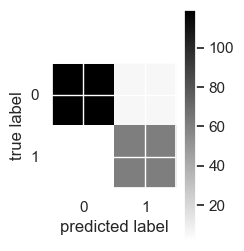

In [247]:
plt.imshow(confusion_matrix(KNN_prediction, Y_test), 
           interpolation='nearest', cmap = plt.cm.binary)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.xticks([0, 1])
plt.yticks([0, 1])

In [248]:
print(classification_report(KNN_prediction, Y_test, digits = 4))

              precision    recall  f1-score   support

           0     0.9835    0.9520    0.9675       125
           1     0.9104    0.9683    0.9385        63

    accuracy                         0.9574       188
   macro avg     0.9470    0.9601    0.9530       188
weighted avg     0.9590    0.9574    0.9578       188



In [249]:
np.mean(KNN.predict(X_test) == Y_test) # Точность на тестовой выборке

0.9574468085106383

In [250]:
np.mean(KNN.predict(X_test) != Y_test) # Ошибка на тестовой выборке

0.0425531914893617

In [251]:
np.mean(KNN.predict(X_train) == Y_train) # Точность на обучающей выборке

0.968503937007874

In [252]:
np.mean(KNN.predict(X_train) != Y_train) # Ошибка на обучающей выборке

0.031496062992125984

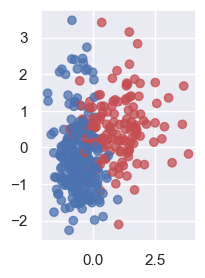

In [253]:
plt.scatter(X_train[:, 0], X_train[:, 1], color = np.array(('b', 'r'))[Y_train], alpha = 0.75)

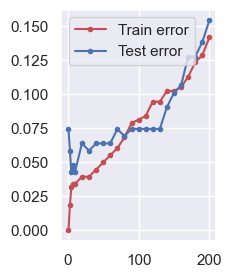

In [254]:
kk = [1, 3, 5, 7] + list(range(10, 201, 10))
err_train = []
err_test = []
for k in kk:
    KNN1 = KNeighborsClassifier(n_neighbors = k)
    KNN1.fit(X_train, Y_train)
    err_train.append(np.mean(KNN1.predict(X_train) != Y_train))
    err_test.append(np.mean(KNN1.predict(X_test) != Y_test))

plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

In [255]:
print(min(err_test))
print(kk[np.argmin(err_test)])

0.0425531914893617
5


### Метод потенциальных функций